In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline   
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_df = pd.read_csv("../data/train.2024.04.16.csv")
test_df = pd.read_csv("../data/test.2024.04.16.csv")
classes = ['ex', 'eq', 'mis']

In [3]:
feature_col_names = ['F01', 'F02', 'F03', 'F04',
       'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13']

In [4]:
train_all_feats_df = train_df[~np.any(np.isnan(train_df[feature_col_names]), axis=1)]
X_train = train_all_feats_df[feature_col_names].to_numpy()
y_train = train_all_feats_df["y"].to_numpy()

In [5]:
test_all_feats_df = test_df[~np.any(np.isnan(test_df[feature_col_names]), axis=1)]
X_test = test_all_feats_df[feature_col_names].to_numpy()
y_test = test_all_feats_df["y"].to_numpy()

In [6]:
def drop_inds(X, y, lb, ub):
    drop_inds = np.unique(np.concatenate([np.unique(np.where(X < lb)[0]), 
                                        np.unique(np.where(X > ub)[0])]))
    keep_inds = np.delete(np.arange(0, X.shape[0]), drop_inds)
    X = X[keep_inds, :]
    y = y[keep_inds]

    return X, y

In [7]:
print(X_train.shape, X_test.shape)
q1, q3  = np.percentile(X_train, [25, 75], axis=0)
IQR = q3 - q1
lower_fence = q1 - IQR*3.0
upper_fence = q3 + IQR*3.0
X_train, y_train = drop_inds(X_train, y_train, lower_fence, upper_fence)
X_test, y_test = drop_inds(X_test, y_test, lower_fence, upper_fence)
print(X_train.shape, X_test.shape)

(757, 13) (207, 13)
(752, 13) (205, 13)


In [8]:
print('Training:', X_train.shape, y_train.shape)
print('Testing:', X_test.shape, y_test.shape)
print('Training class percentage:', np.unique(y_train, return_counts=True)[1]/len(y_train))
print('Testing class percentage:', np.unique(y_test, return_counts=True)[1]/len(y_test))

Training: (752, 13) (752,)
Testing: (205, 13) (205,)
Training class percentage: [0.14893617 0.7393617  0.11170213]
Testing class percentage: [0.17073171 0.69268293 0.13658537]


# Train model

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LinearDiscriminantAnalysis()

In [12]:
model.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

# Train results

In [13]:
y_pred_train = model.predict(X_train_scaled)

In [14]:
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[103   0   9]
 [  0 556   0]
 [  7   0  77]]


In [15]:
f1_score(y_train, y_pred_train, average='macro')

0.944603426956368

# Testing results

In [16]:
y_pred_test = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[ 32   0   3]
 [  0 142   0]
 [  5   0  23]]


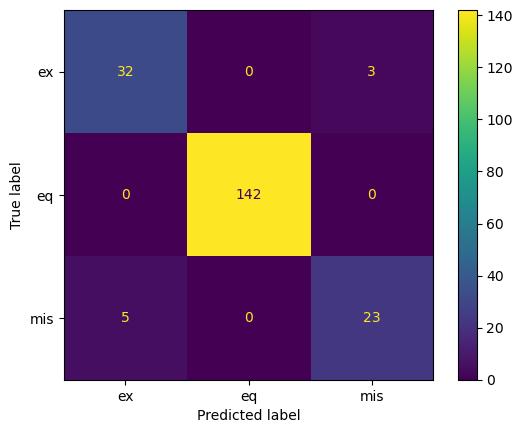

In [17]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, 
                       display_labels=classes)
display.plot()

In [18]:
f1_score(y_test, y_pred_test, average='macro')

0.9135802469135802